------ORIGINAL IMAGE------


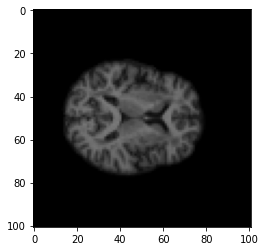

------TRANSFORMED IMAGE 1------


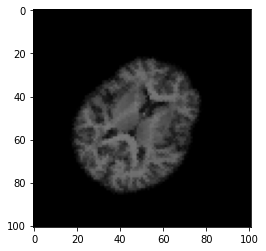

------TRANSFORMED IMAGE 2------


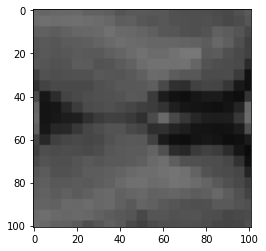

------TRANSFORMED IMAGE 3------


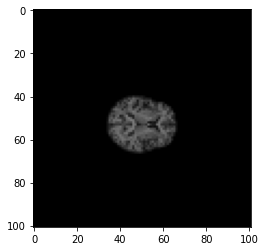

In [3]:
#!/bin/python3 
import sys 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def transform_image(transform_matrix):
    #calculate new pixel poxitions with transformation
    transformed_positions_array = transform_matrix @ positions_array
    #create new empty image
    transformed_image = np.full([width, height], 0, dtype=int)
    #reset the axis to the original image
    for i in range(height):
        for j in range(width):
            pos = i*size + j
            transformed_positions_array[0, pos] += middle_offset
            transformed_positions_array[1, pos] += middle_offset
    #for every pixel position with nearest neighbor interpolation calculate the closest 
    #transformed position and get the intensity of the coresponding pixel from the original
    #image
    for i in range(height):
        for j in range(width):
            min_dist = 1000000
            min_pos_x = -1
            min_pos_y = -1
            #search the transformed positions for the coordinates with the minimum distance
            for k in range(height):
                for l in range(width):
                    pos = k*size + l
                    x = transformed_positions_array[0, pos]
                    y = transformed_positions_array[1, pos]
                    #calculate euclidean distance as the l2 norm of the two pixel posisitions
                    if(np.linalg.norm(np.array((i, j))-np.array((x, y))) < min_dist):
                        #keep the minimum distance and the coresponding coordinates
                        min_dist = np.linalg.norm(np.array((i, j))-np.array((x, y)))
                        min_pos_x = k
                        min_pos_y = l
                    #if we find 0 distance that means we are done her
                    if(min_dist == 0):
                        break
                if(min_dist == 0):
                    break
            #put the old intensity in the new image in the current position
            transformed_image[i][j] =  image_array[min_pos_x][min_pos_y]
    plt.imshow(transformed_image, cmap = "gray", vmin=0, vmax=255)
    plt.show()

print("------ORIGINAL IMAGE------")
image_array = np.array(Image.open("images/brain0030slice150_101x101.png"))
plt.imshow(image_array, cmap = "gray", vmin=0, vmax=255)
plt.show()

#get image dimensions
height = len(image_array)
width = len(image_array[0])
size = height
middle_offset = height//2

positions_array = np.zeros([3, width*height])
positions_array[2, :] = 1

#move image so the middle of axis and the middle of image are adjust
for i in range(height):
    for j in range(width):
        pos = i*size + j
        positions_array[0, pos] = i-middle_offset
        positions_array[1, pos] = j-middle_offset

#transform matrix for scaling
transform_matrix1 = np.array([ [5, 0, 0],
                  [0, 5, 0],
                  [0,   0,  1]
                ])
#transform matrix for scaling
transform_matrix2 = np.array([ [0.5, 0, 3],
                              [0, 0.5, 2],
                              [0, 0, 1] 
                            ])

#transform matrix for rotation
theta = 1
transform_matrix = np.array([ [np.cos(theta), -np.sin(theta), 0],
                  [np.sin(theta),  np.cos(theta), 0],
                  [0,             0,              1]
                ])
print("------TRANSFORMED IMAGE 1------")
transform_image(transform_matrix)
print("------TRANSFORMED IMAGE 2------")
transform_image(transform_matrix1)
print("------TRANSFORMED IMAGE 3------")
transform_image(transform_matrix2)